In [ ]:
%pip install sentence-transformers

In [ ]:
%pip install seaborn

For clustering, we can either load the articles and use the Hugging Face Sentence Tranformer API to gennerate embeddings for the paper abstracts, using an embedding model of choice, or we can use the embeddings generated for our vector database in notebooks 3.x.

In [ ]:
from tinydb import TinyDB, Query

db = TinyDB('db.json')
table = db.table('articles')

articles = table.all()
print(f'loaded {len(articles)} articles')

sentences = [x['abstract'] for x in articles if x['abstract'] != 'No abstract available.']
print(f'retaining {len(sentences)} articles')

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/allenai-specter')
embeddings = model.encode(sentences)

Instead of (re)generating embeddings using the Sentence Transformer API, we can load embeddings from our vector data store.

In [1]:
import chromadb
from chromadb.utils import embedding_functions

client = chromadb.PersistentClient(path="vectors_db")
ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="allenai-specter")
    
collection = client.get_collection(
    name='articles-specter-embeddings',
    embedding_function=ef
)

embeddings = collection.get(
    include=['embeddings']
)['embeddings']

print(f'retrieved {len(embeddings)} paper embeddings')

retrieved 212 paper embeddings


Use t-SNE to reduce dimensionality of the embeddings to two, for 2d visualization.

In [2]:
from sklearn.manifold import TSNE

tsne_embeddings = TSNE(n_components=2, perplexity=100, max_iter=10000).fit_transform(embeddings)

In [3]:
from sklearn.cluster import KMeans

X = tsne_embeddings

model = KMeans(n_clusters=7).fit(X)
centers = model.cluster_centers_
labels = model.labels_.astype(float)

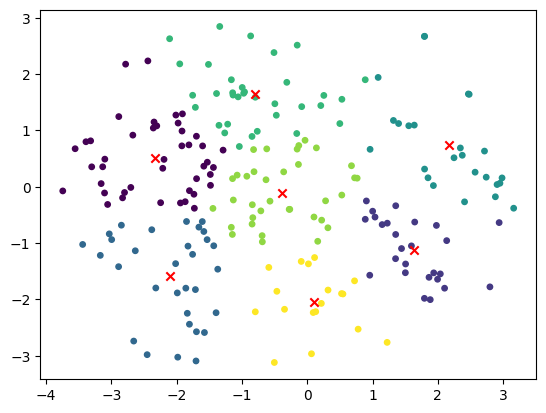

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=15)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red')
plt.show()

<Axes: >

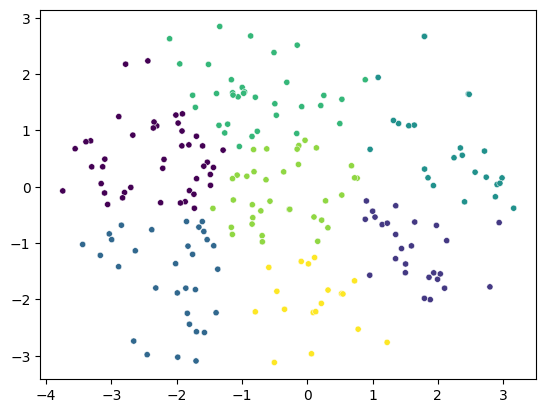

In [5]:
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1], s=20, c=labels)

In [6]:
from sklearn.decomposition import PCA

model = PCA(n_components=2).fit(embeddings)
pca_embeddings = model.transform(embeddings)

In [7]:
from sklearn.cluster import KMeans

X = pca_embeddings

model = KMeans(n_clusters=7).fit(X)
centers = model.cluster_centers_
labels = model.labels_.astype(float)

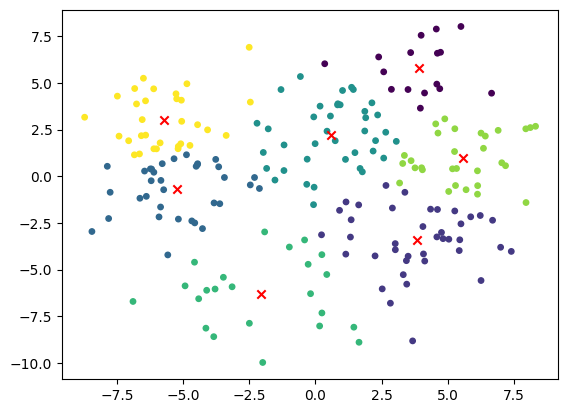

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=15)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red')
plt.show()

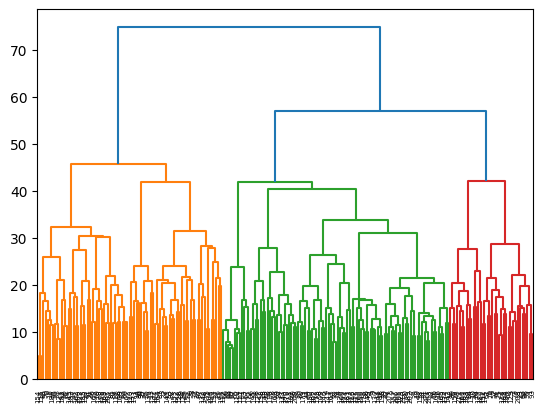

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(embeddings, method='ward')

dendrogram(Z)
plt.show()

In [10]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(Z, 8, criterion='maxclust')

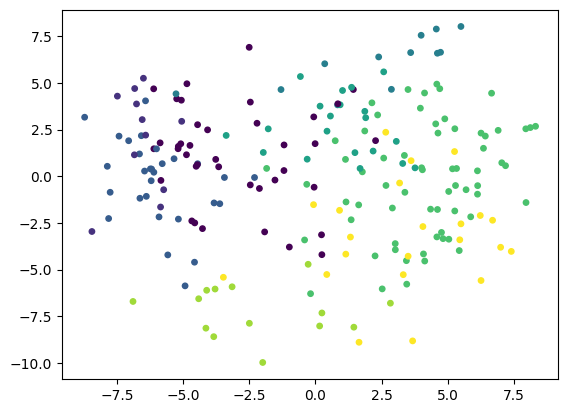

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=15)
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=7, linkage='ward')
model.fit(X)

labels = model.labels_

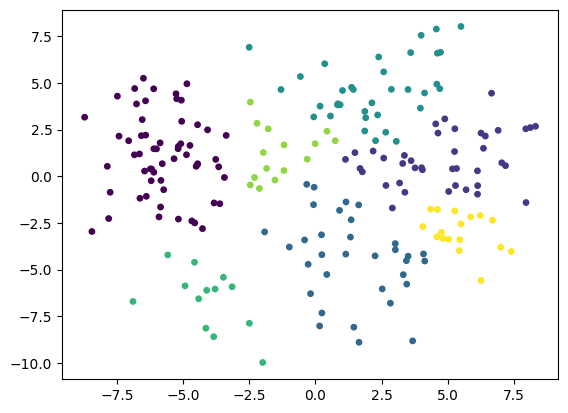

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=15)
plt.show()

Re-run the clustering analysis using the default Chroma embedding model.

In [ ]:
collection = client.get_collection(
    name='articles-default-embeddings'
)

embeddings = collection.get(
    include=['embeddings']
)['embeddings']

print(f'retrieved {len(embeddings)} paper embeddings')

In [ ]:
from sklearn.manifold import TSNE

tsne_embeddings = TSNE(n_components=2, perplexity=100, max_iter=10000).fit_transform(embeddings)

In [ ]:
from sklearn.cluster import KMeans

X = tsne_embeddings

model = KMeans(n_clusters=7).fit(X)
centers = model.cluster_centers_
labels = model.labels_.astype(float)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=15)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red')
plt.show()